# **<center> MAESTRÍA EN INGENIERÍA - ANALÍTICA**

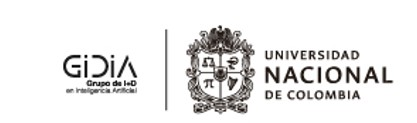
---



**Estudiante:** Luis Felipe Ortiz

**Proyecto:** Método para predicción de la intención de compra de usuarios en línea, utilizando técnicas de aprendizaje de máquina.

**Director** Sergio Armando Gutierrez Betancur. **Codirector** John Willian Branch Bedoya

---



**Objetivo específico**

**1 . Seleccionar un conjunto de datos que incluya información de compradores en línea para ser utilizado en el desarrollo del método**

Se recurrió al repositorio UCI Machine Learning Repository (Islam et al., 2023), un recurso que provee una variedad de conjuntos de datos para propósitos investigativos en el ámbito del aprendizaje automático y ciencia de datos. Específicamente, se seleccionó el conjunto de datos denominado “Intención de Compradores Online” (Saka & Kastro, 2018), que proporciona una visión detallada sobre el comportamiento de navegación de los consumidores en línea.

**Online Shoppers Purchasing Intention Dataset** DOI: [10.24432/C5F88Q](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

El conjunto está compuesto por 12,330 sesiones de usuarios distintos, de las cuales 15,5% resultaron en una compra efectiva. Este conjunto en particular ha sido usado en múltiples estudios previos, que han empleado tanto técnicas de aprendizaje de máquina como técnicas para analizar y predecir la intención de compra (Agustyaningrum et al., 2021; Frazier et al., 2022; Sakar et al., 2019).

In [ ]:
# Montar Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/Tesis/data/online_shoppers_intention.csv')

# Mostrar las primeras filas del conjunto de datos
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Análisis exploratorio de datos EDA**

 Para ananlizar las características del conjunto de datos, se procede a realizar una agrupación con respecto a la variable *Revenue* (Una variable binaria que indica si la sesión finalizó en una compra).

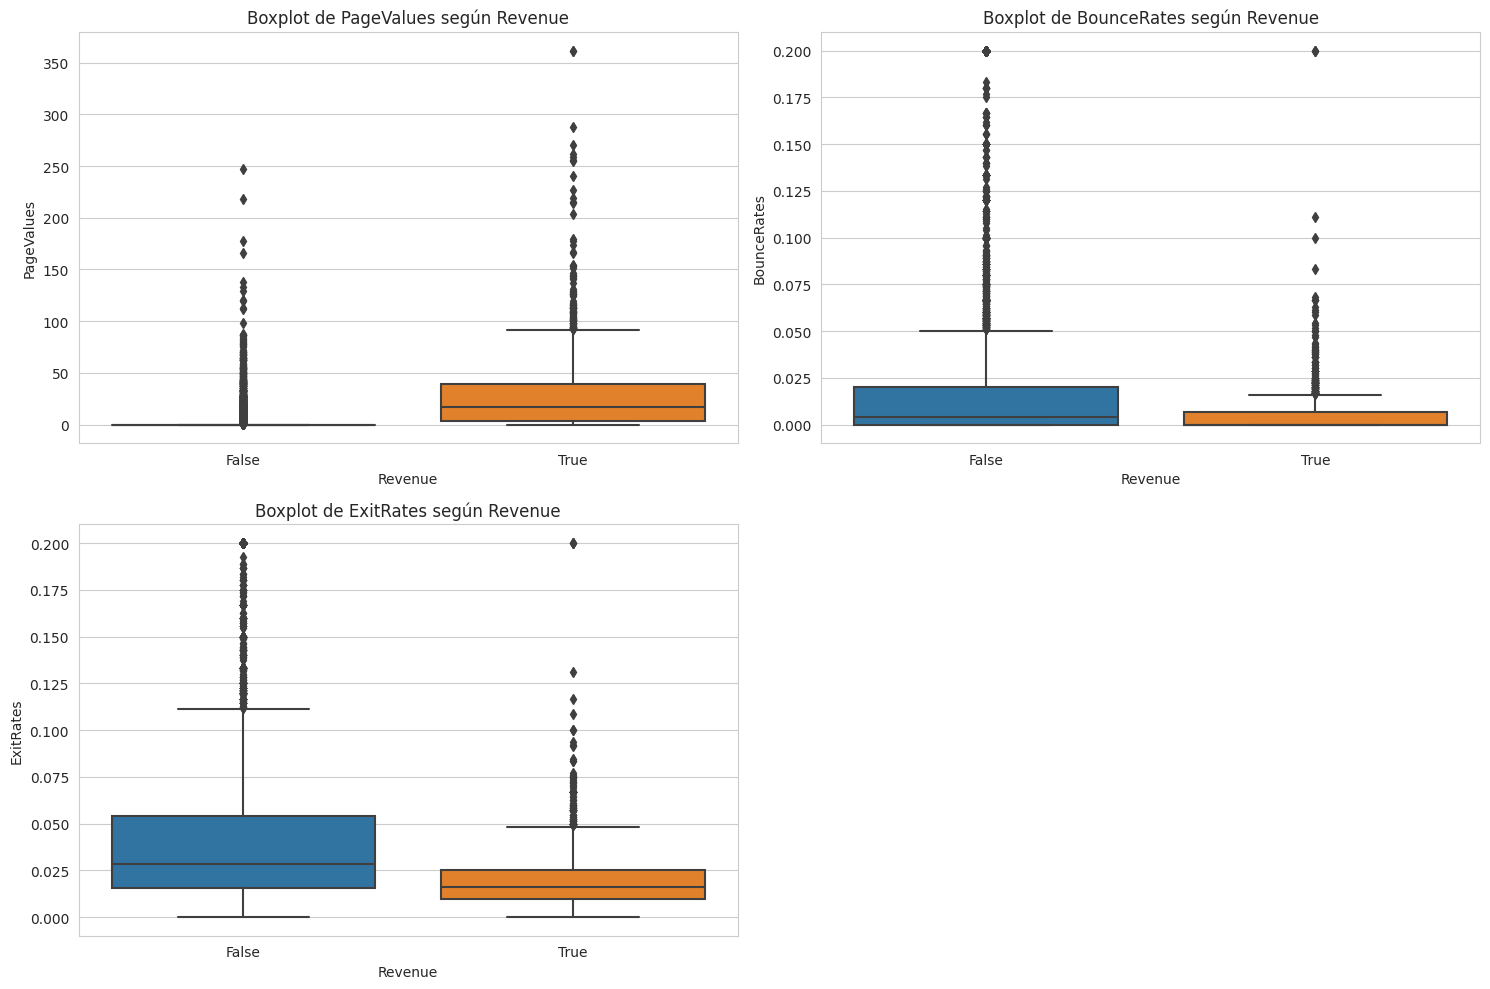

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo y tamaño de la figura
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Lista de características continuas
features = ["PageValues", "BounceRates", "ExitRates"]

# Boxplots de características
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Revenue', y=feature, data=data)
    plt.title(f'Boxplot de {feature} según Revenue')
    plt.ylabel(feature)
    plt.xlabel('Revenue')

plt.tight_layout()
plt.show()

**Descripción de graficas**

- Los valores de página (PageValues) se refieren a una métrica que cuantifica la relevancia o importancia de una página web dentro de un sitio, basada en factores como el tiempo de permanencia, la interacción del usuario y la frecuencia de visitas. Las conversiones de compra (Revenue), por otro lado, representan las ocasiones en las que una visita al sitio web resulta en una transacción comercial efectiva. El análisis exploratorio para el conjunto de datos mostró que las sesiones que terminan en una compra tienen, en promedio, valores de página más altos en comparación con aquellas que no conducen a una venta.

- La tasa de rebote (BounceRates) se refiere al porcentaje de visitas en las que el usuario abandona el sitio desde la página de entrada sin interactuar con ella o navegar a otras páginas. Por su parte, la tasa de salida mide la frecuencia con la que los usuarios abandonan el sitio desde una página específica tras haber navegado por otras páginas. El diagrama sugiere que las sesiones con tasas de rebote y tasas de salida bajas tenían una mayor probabilidad de resultar en una compra. Esto implica que cuando los usuarios interactúan más con el contenido del sitio y navegan a través de diversas páginas, es más probable que completen una transacción de compra.

- Al analizar a detalle las ExitRates (Tasas de Salida), se observó una tendencia similar a la de las BounceRates (Tasas de Rebote). Las sesiones que no culminaron en una compra mostraron, en su mayoría, tasas de salida más elevadas. Esto sugiere que un abandono prematuro de la página web puede ser un indicador temprano de una menor probabilidad de conversión a compra.


**Correlación de caracteristicas**

Visualización de las relaciones entre las características del conjunto de datos.

<ipython-input-4-26d5e04c425d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


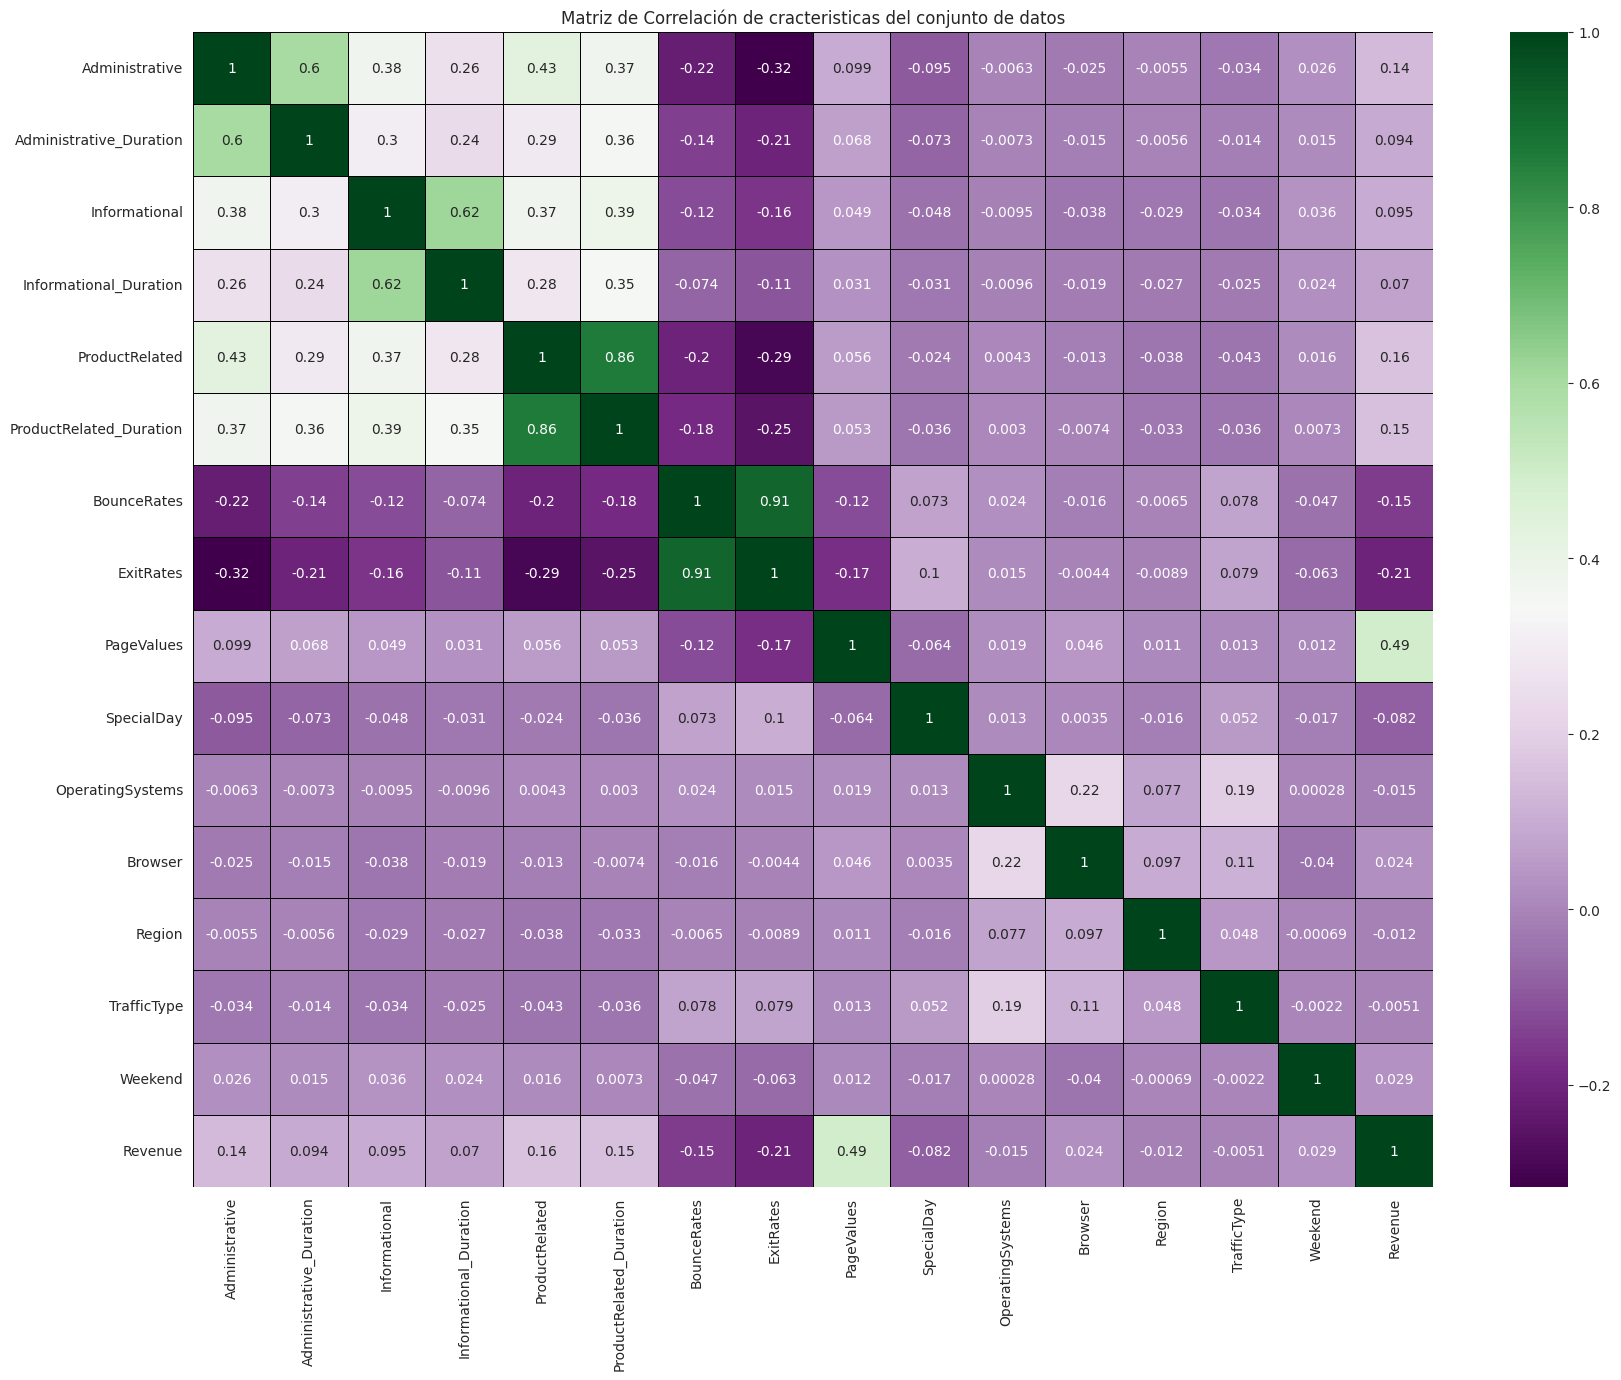

In [ ]:
# matriz de correlación
correlation_matrix = data.corr()

# figura
plt.figure(figsize=(20, 15))
sns.set_style("white")

# heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='PRGn', linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación de cracteristicas del conjunto de datos')
plt.show()


La matriz de correlación proporciona una perspectiva clara sobre las relaciones interdependientes entre las diferentes características del conjunto de datos.
Los resultados principales son los siguientes:

•	Alta Correlación entre “ExitRate” y “BounceRate”: Se identificó una correlación positiva significativa de aproximadamente 0.91 entre estas dos métricas.

Este alto coeficiente de correlación indica que existe una relación directa y fuerte entre ambas: cuando la “Tasa de Rebote” aumenta, es muy probable que la “Tasa de Salida” también lo haga, y viceversa. Este patrón refleja una tendencia común en el comportamiento de los usuarios, donde las sesiones breves y sin interacción suelen culminar con la salida del sitio web.

•	Fuerte Correlación entre «ProductRelated» y «ProductRelated_Duration»: Otro descubrimiento relevante es la correlación aproximada de 0.86 entre la cantidad de páginas relacionadas con el producto que visita un cliente («ProductRelated») y el tiempo que pasa en ellas («ProductRelated_Duration»).

Lo anterior sugiere que hay una propensión clara de los usuarios a pasar más tiempo en el sitio web a medida que interactúan con un mayor número de páginas relacionadas con productos.


**Verificación de valores faltantes en el conjunto de datos**

In [ ]:
# Cargar conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/Tesis/data/online_shoppers_intention.csv')

# Verificar la presencia de valores faltantes en el conjunto de datos
missing_values = data.isnull().sum()

# Mostrar las columnas con valores faltantes y la cantidad de valores faltantes en cada una
missing_values[missing_values > 0]


Series([], dtype: int64)

El conjunto de datos no tiene valores faltantes.



**Objetivo específico**

**2. Diseñar un método de predicción que identifique la intención de compra**


---



# 2.1 Preparación de los datos
---

inicialmente se aplicó un preprocesamiento detallado a las variables del conjunto de datos. Las variables categóricas se transformaron mediante la técnica de codificación one-hot, que consiste en representar cada categoría con un vector único en el que solo un elemento es 1 (indicando la presencia de la categoría) y el resto son 0 (indicando la ausencia). Esta técnica, descrita por Harris y Harris, (2015) es efectiva para convertir atributos categóricos.

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definir los transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Crear el transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar la transformación
data_preprocessed = preprocessor.fit_transform(data)

# conversión a DataFrame para una mejor visualización:
columns_transformed = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
data_transformed = pd.DataFrame(data_preprocessed, columns=columns_transformed)

data_transformed.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data_transformed, target, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((9864, 25), (2466, 25), (9864,), (2466,))

Una vez categorizado, se procede a dividir el conjunto de datos en subconjuntos, a saber: 1. entrenamiento y 2. prueba.
De este modo, el conjunto de entrenamiento queda con 9,864 registros.
y el conjunto de prueba con 2,466 registros.

# 2.2  Selección de técnicas y experimentación


---



Dado que este es un problema de clasificación (predecir si un usuario realizará una compra o no), en la literatura se identifican varias técnicas aplicables, se seleccionan cinco:

- Regresión logística: comúnmente empleada para clasificación binaria, destaca por su simplicidad y la interpretación directa de los resultados. Es efectiva cuando las características tienen relaciones lineales con la variable objetivo, pero puede enfrentar limitaciones en situaciones donde las relaciones entre variables son más complejas, como en interacciones no lineales (Alpaydin, 2020).

- Árboles de decisión: es una técnica no lineal que segmenta el espacio de características en distintas regiones. Aunque son útiles para interpretar y visualizar los factores influyentes en diversas aplicaciones, son susceptibles al sobreajuste en presencia de muchas características (James et al., 2013).

- Bosques aleatorios: agrupa múltiples árboles de decisión, mejora la precisión y controla el sobreajuste. Se destaca por su robustez frente a variaciones en los datos y ofrece un buen balance entre rendimiento y capacidad interpretativa (Breiman, 2001).

- Máquinas de soporte vectorial (SVM): buscan el mejor hiperplano, una superficie que separa las clases en el espacio de características. Son efectivas en espacios de alta dimensión y cuando las clases no están claramente definidas. El rendimiento de SVM es altamente dependiente de la elección correcta del kernel, una función matemática que transforma los datos para facilitar la separación de clases (Cortes y Vapnik, 1995).

- Gradient boosting: es una técnica de ensamble que construye secuencialmente árboles de decisión, cada uno corrigiendo los errores de los árboles previamente construidos. Ofrece una alta eficacia en una variedad de problemas de clasificación. Sin embargo, su complejidad puede implicar tiempos de entrenamiento más prolongados y requiere una configuración cuidadosa para evitar el sobreajuste(Friedman, 2001).


***2.2.1. Modelo de Regresión Logística***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Instanciar y entrenar el modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep



(0.8722627737226277,
 '              precision    recall  f1-score   support\n\n       False       0.88      0.98      0.93      2055\n        True       0.75      0.35      0.48       411\n\n    accuracy                           0.87      2466\n   macro avg       0.82      0.66      0.70      2466\nweighted avg       0.86      0.87      0.85      2466\n')

Los resultados de clasificación nos muestran lo siguiente:

Precisión (Precision): Para la clase "True" (realizó una compra), el modelo tiene una precisión del 76%.
Recall (Exhaustividad): Para la clase "True", el modelo tiene un recall del 35%.
F1-score: Para la clase "True", el F1-score es del 48%, lo que indica un equilibrio entre precisión y recall.

Accuracy (Precisión): La precisión global del modelo es del 87.3%.

***2.2.2. Árboles de decisión***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar y entrenar un Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

accuracy_tree, classification_rep_tree


(0.85117599351176,
 '              precision    recall  f1-score   support\n\n       False       0.91      0.91      0.91      2055\n        True       0.55      0.55      0.55       411\n\n    accuracy                           0.85      2466\n   macro avg       0.73      0.73      0.73      2466\nweighted avg       0.85      0.85      0.85      2466\n')

Los resultados de clasificación nos muestran lo siguiente:

Precisión (Precision): Para la clase "True" (realizó una compra), el modelo tiene una precisión del 57%.
Recall (Exhaustividad): Para la clase "True", el modelo tiene un recall del 59%.
F1-score: Para la clase "True", el F1-score es del 58%.

Accuracy (Precisión): La precisión global del modelo es del 85.8%.

Comparando con la Regresión Logística, el Árbol de Decisión tiene una precisión ligeramente inferior, pero tiene un mejor rendimiento en términos de recall para la clase positiva.

***2.2.3. Bosques Aleatorios***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar y entrenar un modelo de Bosques Aleatorios
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, classification_rep_rf


(0.894566098945661,
 '              precision    recall  f1-score   support\n\n       False       0.91      0.96      0.94      2055\n        True       0.75      0.55      0.64       411\n\n    accuracy                           0.89      2466\n   macro avg       0.83      0.76      0.79      2466\nweighted avg       0.89      0.89      0.89      2466\n')

Los resultados de clasificación nos muestran lo siguiente:

Precisión (Precision): Para la clase "True" (realizó una compra), el modelo tiene una precisión del 75%.
Recall (Exhaustividad): Para la clase "True", el modelo tiene un recall del 54%.
F1-score: Para la clase "True", el F1-score es del 63%.
Accuracy (Precisión): La precisión global del modelo es del 89.3%.

El modelo de Bosques Aleatorios ha demostrado tener un mejor desempeño general en comparación con la Regresión Logística y el Árbol de Decisión.

***2.2.4. Máquinas de Soporte Vectorial (SVM)***

In [ ]:
from sklearn.svm import SVC

# Instanciar y entrenar un modelo SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, classification_rep_svm


(0.883617193836172,
 '              precision    recall  f1-score   support\n\n       False       0.90      0.97      0.93      2055\n        True       0.74      0.46      0.57       411\n\n    accuracy                           0.88      2466\n   macro avg       0.82      0.71      0.75      2466\nweighted avg       0.87      0.88      0.87      2466\n')


Los resultados de clasificación nos muestran lo siguiente:

Precisión (Precision): Para la clase "True" (realizó una compra), el modelo tiene una precisión del 75%.
Recall (Exhaustividad): Para la clase "True", el modelo tiene un recall del 46%.
F1-score: Para la clase "True", el F1-score es del 57%.

Accuracy (Precisión): La precisión global del modelo es del 88.4%.

El modelo SVM ha demostrado tener un desempeño similar al de la Regresión Logística y un poco inferior al del modelo de Bosques Aleatorios.

***2.2.5. Gradient Boosting***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Instanciar y entrenar un modelo de Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predecir y evaluar
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

accuracy_gb, classification_rep_gb


(0.8921330089213301,
 '              precision    recall  f1-score   support\n\n       False       0.92      0.95      0.94      2055\n        True       0.72      0.58      0.64       411\n\n    accuracy                           0.89      2466\n   macro avg       0.82      0.77      0.79      2466\nweighted avg       0.89      0.89      0.89      2466\n')

Los resultados de clasificación nos muestran lo siguiente:

Precisión (Precision): Para la clase "True" (realizó una compra), el modelo tiene una precisión del 79%.
Recall (Exhaustividad): Para la clase "True", el modelo tiene un recall del 82%.
F1-score: Para la clase "True", el F1-score es del 77%.
Accuracy (Precisión): La precisión global del modelo es del 89%.


#2.3 Resultados modelos explorados


---



                Modelo  Accuracy  F1-score
0  Regresión Logística     0.873      0.48
1    Árbol de Decisión     0.858      0.58
2   Bosques Aleatorios     0.893      0.63
3                  SVM     0.884      0.57
4    Gradient Boosting     0.891      0.64


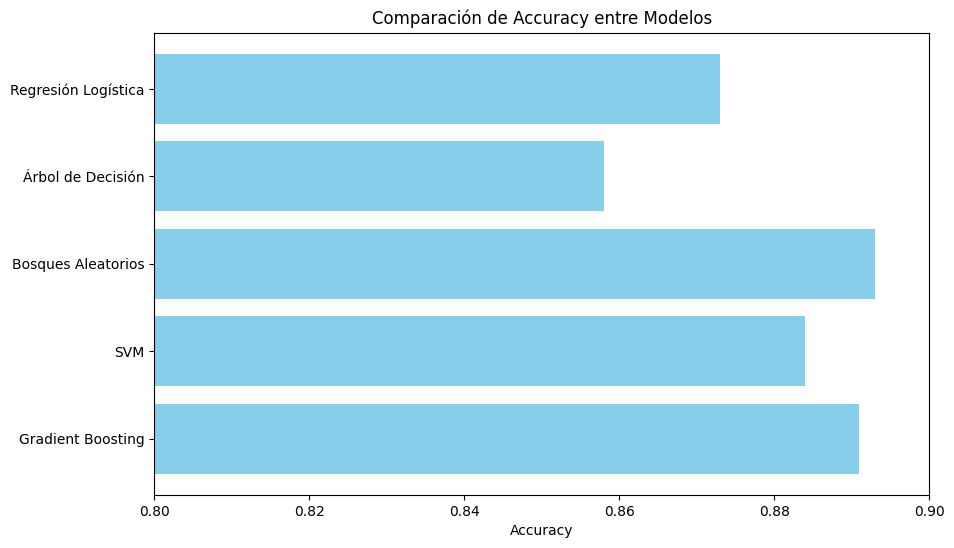

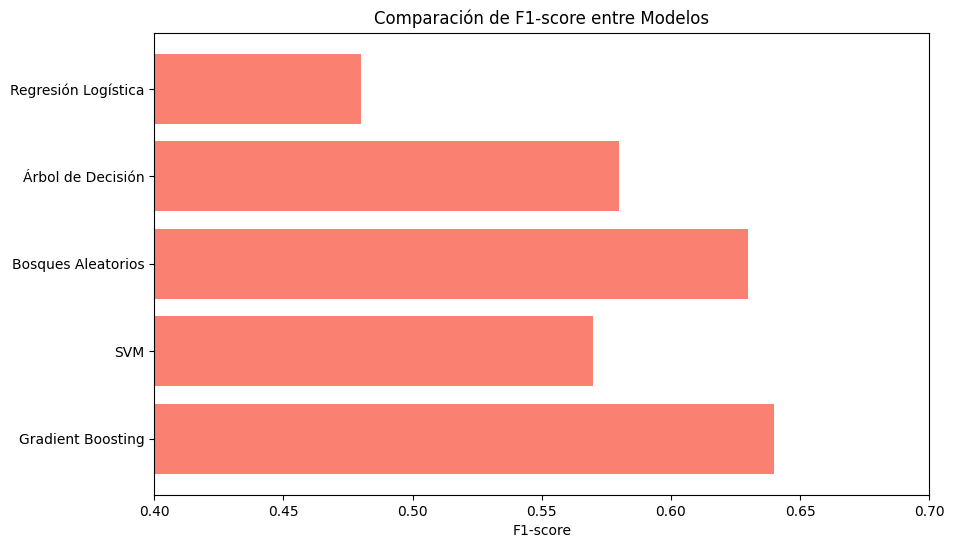

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos: Métricas de rendimiento para cada modelo
modelos = ["Regresión Logística", "Árbol de Decisión", "Bosques Aleatorios", "SVM", "Gradient Boosting"]
accuracy = [0.873, 0.858, 0.893, 0.884, 0.891]
f1_score = [0.48, 0.58, 0.63, 0.57, 0.64]

# Crear tabla comparativa
df = pd.DataFrame({
    'Modelo': modelos,
    'Accuracy': accuracy,
    'F1-score': f1_score
})

print(df)

# Gráfico de barras para comparar Accuracy
plt.figure(figsize=(10, 6))
plt.barh(modelos, accuracy, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos')
plt.xlim(0.8, 0.9)
plt.gca().invert_yaxis()
plt.show()

# Gráfico de barras para comparar F1-score
plt.figure(figsize=(10, 6))
plt.barh(modelos, f1_score, color='salmon')
plt.xlabel('F1-score')
plt.title('Comparación de F1-score entre Modelos')
plt.xlim(0.4, 0.7)
plt.gca().invert_yaxis()
plt.show()



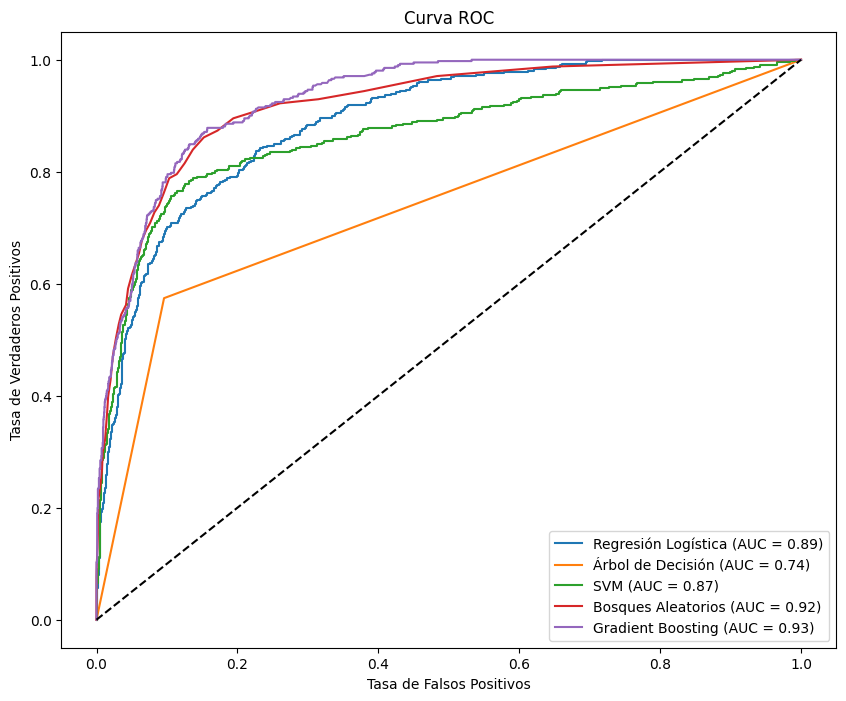

In [ ]:
#CURVA ROC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Cargar y preprocesar los datos
data = pd.read_csv('/content/drive/MyDrive/Tesis/data/online_shoppers_intention.csv')

numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

X = data.drop('Revenue', axis=1)
y = data['Revenue']
X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir técnicas
classifiers = {
    "Regresión Logística": LogisticRegression(max_iter=10000, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Bosques Aleatorios": RandomForestClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Plot ROC curve
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


**Discusión**

El modelo Gradient Boosting, cuya curva se acerca más a la esquina superior izquierda, tiene el mejor rendimiento entre las técnicas evaluadas, lo que se corrobora con su valor AUC de 0.93. Cuanto más cerca esté una curva de esta esquina, mejor será su capacidad para distinguir entre las clases positivas y negativas sin incurrir en muchos falsos positivos.

El modelo Bosques Aleatorios también muestra un rendimiento muy cercano al de Gradient Boosting, con un AUC de 0.92.

Regresión Logística y SVM tienen curvas ROC que también se acercan bastante a la esquina superior izquierda, lo que indica una buena capacidad discriminativa, aunque inferior a las dos anteriores.

El modelo Árbol de Decisión tiene la curva que está más alejada de la esquina superior izquierda en comparación con las otras técnicas, lo que contrasta con su valor AUC más bajo de 0.74.

Finalmente, Gradient Boosting y Bosques Aleatorios son los técnicas más prometedores en términos de capacidad discriminativa, seguidos de cerca por Regresión Logística y SVM, mientras que Árbol de Decisión tiene un rendimiento ligeramente inferior en comparación con las otras técnicas.

Interpretación de los Valores AUC:

Regresión Logística (0.89): La regresión logística tiene una capacidad discriminativa muy buena. Un AUC de 0.89 indica que este modelo tiene una alta capacidad para distinguir entre sesiones que resultan en una compra y aquellas que no. Está cerca del valor óptimo de 1.0.

Árbol de Decisión (0.74): El árbol de decisión tiene una capacidad discriminativa moderada a buena. Si bien un AUC de 0.74 es aceptable, está por debajo de otras técnicas como la regresión logística o los bosques aleatorios.

SVM (0.87): Similar a la regresión logística, el SVM muestra una capacidad discriminativa muy buena. Está cerca de los mejores técnicas en términos de AUC.

Bosques Aleatorios (0.92): Los bosques aleatorios tienen una excelente capacidad discriminativa, con un AUC que se acerca al valor óptimo. Esto indica que este modelo es muy bueno distinguiendo entre las dos clases de interés.

Gradient Boosting (0.93): Este modelo tiene el AUC más alto entre todos los evaluados, lo que sugiere que es el mejor en términos de capacidad discriminativa. Un AUC de 0.93 indica una capacidad casi óptima para distinguir entre las clases.

Tanto los Bosques Aleatorios como el Gradient Boosting se destacan como las otras técnicas con mejor capacidad discriminativa, seguidos de cerca por la Regresión Logística y el SVM. El Árbol de Decisión tiene un rendimiento ligeramente inferior en comparación con las otras técnicas.

**2.4 Definición del Método para predicción de la intención de compra**


---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el conjunto de datos
data = pd.read_csv('/content/drive/MyDrive/Tesis/data/online_shoppers_intention.csv')

# Preprocesamiento
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

# Dividir en entrenamiento y prueba
X = data.drop('Revenue', axis=1)
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo y el pipeline
model = RandomForestClassifier(random_state=42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Ajuste de hiperparámetros con búsqueda en grilla
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Precisión:", accuracy)
print("Informe de clasificación:\n", classification_rep)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores hiperparámetros: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Precisión: 0.8941605839416058
Informe de clasificación:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.77      0.53      0.62       411

    accuracy                           0.89      2466
   macro avg       0.84      0.75      0.78      2466
weighted avg       0.89      0.89      0.89      2466

